# Process CINIC-10 Dataset


In this notebook, we extract 30,000 images (3,000 for each class) from each of the 10 classes from either CIFAR 10 portion or the ImagineNet portion of the CINIC-10 dataset. This way, we could have trainset and tesetset for same 10 classes, but from different distribution. Resulting a distribution shift.


In [1]:
import os
import numpy as np
import tarfile
import urllib.request
import random
from PIL import Image
from tqdm import tqdm
import shutil
import os
import matplotlib.pyplot as plt
import pickle

# add ../../.. to the path (MIAE)
import sys
currdir = os.getcwd()
sys.path.append(os.path.join(currdir, '../../..'))
from miae.utils.dataset_utils import dataset_split

seed = 0
random.seed(seed)
np.random.seed(seed)

In [2]:
# Function to download and extract CINIC-10 dataset
def download_and_extract_cinic10(url, dest_path):
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)
    filename = url.split('/')[-1]
    filepath = os.path.join(dest_path, filename)
    if not os.path.exists(filepath):
        print(f"Downloading {filename}...")
        urllib.request.urlretrieve(url, filepath)
        print("Download complete.")
    print(f"Extracting {filename}...")
    with tarfile.open(filepath, "r:gz") as tar:
        tar.extractall(path=dest_path)
    print("Extraction complete.")

    # Function to extract a subset of images from a given dataset path
def extract_subset(dataset_path, num_images_per_class, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    classes = os.listdir(dataset_path)
    for c in classes:
        cls_path = os.path.join(dataset_path, c)
        images = os.listdir(cls_path)
        selected_images = random.sample(images, num_images_per_class)
        class_dir = os.path.join(output_dir, c)
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)
        for img in tqdm(selected_images, desc=f"Extracting {num_images_per_class} images from class {c} to {output_dir}"):
            img_path = os.path.join(cls_path, img)
            shutil.copy(img_path, class_dir)


In [3]:
# URLs and paths for CINIC-10 dataset
cinic10_url = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y'
cinic10_path = '/data/public/CINIC10'

# Download and extract CINIC-10 dataset
download_and_extract_cinic10(cinic10_url, cinic10_path)


# Paths for CINIC-10 CIFAR-10 and ImageNet subsets
cinic10_cifar10_train_path = os.path.join(cinic10_path, 'train')
cinic10_imagenet_test_path = os.path.join(cinic10_path, 'test')

# Extract 30,000 images from CINIC-10 CIFAR-10 train set (3,000 per class)
cifar10_train_subset_dir = '/data/public/CINIC10/CINIC10_60ksubset/cifar10_train_subset'
extract_subset(cinic10_cifar10_train_path, 3000, cifar10_train_subset_dir)

# Extract 30,000 images from CINIC-10 ImageNet test set (3,000 per class)
imagenet_test_subset_dir =  '/data/public/CINIC10/CINIC10_60ksubset/imagenet_test_subset'
extract_subset(cinic10_imagenet_test_path, 3000, imagenet_test_subset_dir)

print("Dataset preparation complete.")

Extracting CINIC-10.tar.gz?sequence=4&isAllowed=y...
Extraction complete.


Extracting 3000 images from class frog to /data/public/CINIC10/CINIC10_60ksubset/cifar10_train_subset: 100%|██████████| 3000/3000 [00:00<00:00, 20882.63it/s]
Extracting 3000 images from class cat to /data/public/CINIC10/CINIC10_60ksubset/cifar10_train_subset: 100%|██████████| 3000/3000 [00:00<00:00, 23988.61it/s]
Extracting 3000 images from class bird to /data/public/CINIC10/CINIC10_60ksubset/cifar10_train_subset: 100%|██████████| 3000/3000 [00:00<00:00, 24161.02it/s]
Extracting 3000 images from class airplane to /data/public/CINIC10/CINIC10_60ksubset/cifar10_train_subset: 100%|██████████| 3000/3000 [00:00<00:00, 24745.45it/s]
Extracting 3000 images from class automobile to /data/public/CINIC10/CINIC10_60ksubset/cifar10_train_subset: 100%|██████████| 3000/3000 [00:00<00:00, 24659.42it/s]
Extracting 3000 images from class dog to /data/public/CINIC10/CINIC10_60ksubset/cifar10_train_subset: 100%|██████████| 3000/3000 [00:00<00:00, 24661.35it/s]
Extracting 3000 images from class horse to /

Dataset preparation complete.


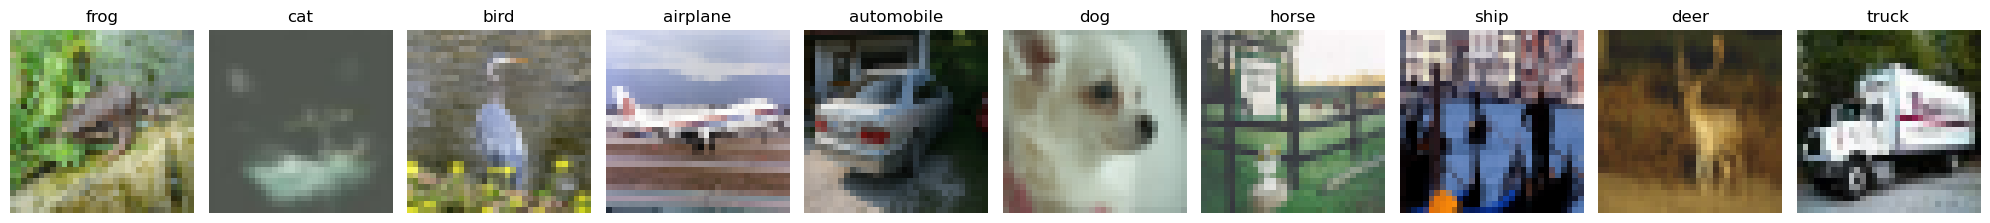

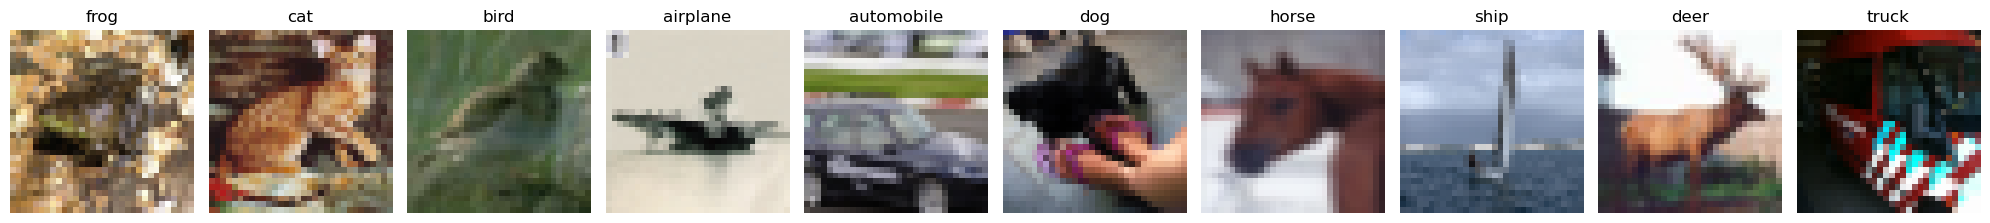

In [4]:
import matplotlib.pyplot as plt

# Define the number of rows and columns for the subplots
num_rows = 1
num_cols = 10

# Create the first plot
fig1, axes1 = plt.subplots(num_rows, num_cols, figsize=(20, 4))

# Flatten the axes array
axes1 = axes1.flatten()

train_classes = os.listdir(cifar10_train_subset_dir)

# Iterate over the images and display them as subplots
for i, c in enumerate(train_classes):
    cls_path = os.path.join(cifar10_train_subset_dir, c)
    images = os.listdir(cls_path)
    image_path = os.path.join(cls_path, images[0])
    image = plt.imread(image_path)
    axes1[i].imshow(image)
    axes1[i].set_title(c)
    axes1[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Create the second plot
fig2, axes2 = plt.subplots(num_rows, num_cols, figsize=(20, 4))

# Flatten the axes array
axes2 = axes2.flatten()

# Iterate over the images and display them as subplots
for i, c in enumerate(train_classes):
    cls_path = os.path.join(imagenet_test_subset_dir, c)
    images = os.listdir(cls_path)
    image_path = os.path.join(cls_path, images[1])
    image = plt.imread(image_path)
    axes2[i].imshow(image)
    axes2[i].set_title(c)
    axes2[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



In [5]:
import torch
import torch.utils.data as data
import torchvision.datasets as datasets
from torchvision import transforms

class CINIC10(data.Dataset):
    def __init__(self, image_folder):
        self.image_folder = image_folder
        self.transform = transforms.Compose([transforms.ToTensor()])

    def __len__(self):
        return len(self.image_folder)

    def __getitem__(self, idx):
        img, label = self.image_folder[idx]
        return (self.transform(img), label)

dataset_save_dir = '/data/public/comp_mia_data/same_attack_different_distribution/target/cinic10'

# Define transformations (if any)
transform = transforms.Compose([
    transforms.ToTensor()
])

# saving the target_train, target_test, and auxiliary datasets
train_set = CINIC10(datasets.ImageFolder(root=cifar10_train_subset_dir))
test_set = CINIC10(datasets.ImageFolder(root=imagenet_test_subset_dir))

# build the target_train, target_test, and auxiliary datasets
train_dataset = data
target_train_len, target_test_len = 30000, len(train_set) - 30000
target_trainset, target_testset = dataset_split(train_set, [target_train_len, target_test_len], shuffle_seed=seed)
aux_set = test_set

target_membership = np.concatenate([np.ones(len(target_trainset)), np.zeros(len(aux_set))])

# save with pickle
with open(os.path.join(dataset_save_dir, "target_trainset.pkl"), "wb") as f:
    pickle.dump(target_trainset, f)
with open(os.path.join(dataset_save_dir, "target_testset.pkl"), "wb") as f:
    pickle.dump(target_testset, f)
with open(os.path.join(dataset_save_dir, "aux_set.pkl"), "wb") as f:
    pickle.dump(aux_set, f)

dataset_to_attack = data.ConcatDataset([target_trainset, target_testset])
index_to_data = {}
for i in range(len(dataset_to_attack)):
    index_to_data[i] = dataset_to_attack[i]

with open(os.path.join(dataset_save_dir, "index_to_data.pkl"), "wb") as f:
    pickle.dump(index_to_data, f)

np.save(os.path.join(dataset_save_dir, "attack_set_membership.npy"), target_membership)

print(f"Subset saved successfully to {dataset_save_dir}")

Subset saved successfully to /data/public/comp_mia_data/same_attack_different_distribution/target/cinic10
